<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Евгений! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы». 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂
 
<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
</div>

# Определение возраста покупателей

Цель исследования: предсказать возраст покупателей магазина по их фотографии

## Исследовательский анализ данных

In [1]:
# импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [2]:
# целевые признаки

df_age = pd.read_csv('/datasets/faces/labels.csv')
df_age

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17
...,...,...
7586,007608.jpg,14
7587,007609.jpg,37
7588,007610.jpg,28
7589,007611.jpg,20


In [3]:
# размер выборки

df_age.shape[0]

7591

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Теперь ты знаешь количество фотографий в датасете. Учитывая эту информацию, а также то, что ты знаешь что мы решаем задачу регрессии, попробуй порассуждать, достаточно ли имеющихся данных? Какие шаги мы можем предпринять в связи с этим?   

</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Привет, Дмитрий! Спасибо за проверку и комментарии. Постараюсь разобраться в твоих вопросах.
    
Как я понимаю, чем больше объектов будет в выборке, тем более точная модель будет построена на её основе. Но чем больше объектов, тем больше и затрат: как финансовых, так и по времени.
    
В задаче регрессии объекты должны охватывать, во-первых, всю область значений, и во-вторых, должно быть достаточное число объектов на каждом интервале значений.
    
У нас есть фотографии практически на каждый возраст от 1 до 100 (кроме некоторых возрастов за 90), поэтому можно считать, что охвачена вся область значений целевого признака.
    
Интервалом значений, на котором обязательно должны быть объекты, у нас является 1 год, то  есть в среднем выходит (7600/100) по 76 фото на один возраст. Вроде бы вполне достаточно, но это среднее значение, а в реальности где-то больше 300 фото на один возраст, а где-то меньше 20-ти.
    
Таким образом, получается, что, в целом, данных недостаточно. Избыток фотографий одного возраста здесь не компенсирует недостаток фотографий другого. Поэтому желательно, исходя из имеющихся возможностей, сделать выборку более равномерной по возрастам, а именно: добавить побольше детско-подростковых фотографий, добавить фото возрастов от 50-ти до 70-ти (более старшие возраста можно оставить как есть, так как чем выше возраст, тем труднее найти соответствующий объект).
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> ответ ревьюера v2</b>
    
    
В целом ты прав, данных маловато. И обычно при обучении нейронных сетей данных используется заметно больше. Кстати, не переживай, что "больше данных означает больше затрат". Здесь как правило работает другая логика - больше данных - это самый простой и дешевый способ улучшиь качество моделей. В том числе потому, что часто работа разметчиков данных стоит сильно дешевле, чем стоимость работы ML инженера.
    
Рассуждения у тебя вполне зрелые и интересные. Ниже оставлю свой вариант ответа "для расширения кругозора". 
    
<hr>    
    
    
На самом деле однозначно понять, достаточно ли фотографий сложно. Очень много зависит от доменной области (медицина или спутниковые снимки), требований заказчика к точности, качества датасета, шумности разметки и т.д.
 
Но прибрести опыт и интуицию, чтобы хотябы приблизительно оценить можно и нужно. Именно поэтому я предложил тебе задуматься над этим вопросом и порассуждать.
    

Давай попробую привести свою оценку. Есть средняя "в вакууме" оценка - 1000 изображений на класс для задачи классификации. Мы решаем задачу регрессии, нужно получить mae меньше 8. Можно представить близкую задачу классификации на 15 классов, которая дает похожую точность. В этом случае нам нужно 15000 изображений, т.е.в два раза больше чем у нас есть. Но хорошая новость - в два раза это не в десять, к тому же мы можем использовать отражения, поэтому по предварительной оценке данных должно хвататить.
</div>

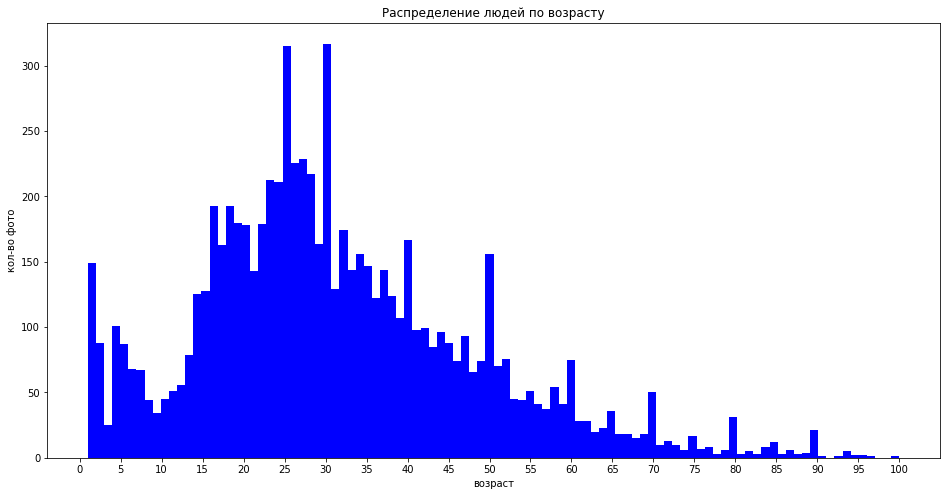

In [4]:
# рспределение возрастов в выборке

plt.figure(figsize=(16,8))

plt.hist(df_age['real_age'], bins=100, color='b')
plt.title('Распределение людей по возрасту')
plt.xlabel('возраст')
plt.ylabel('кол-во фото')
plt.xticks(range(0, 101, 5))
plt.show()

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Гистограмма получена, но она не очень информативна. Рекомендую увеличить количество корзин (bins) до 100, это поможет увидеть некоторые особенности наших данных.</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Увеличил количество корзин по одной на каждый год. Явно нарушается распределение в возрастах 30, 40, 50 и далее, кратных 10-ти, лет. Похоже, таким образом заполнялись пропуски в возрасте или проставлен приблизительный возраст, где нет точных данных. Отразил в выводе.
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> Отлично! </div>

In [5]:
# извлечение фотографий с помощью загрузчика

datagen = ImageDataGenerator(rescale=1/255)
datagen_flow = datagen.flow_from_dataframe(
    dataframe=df_age,
    directory='/datasets/faces/final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    bath_size=32,
    class_mode='raw',
    seed=12345)

Found 7591 validated image filenames.


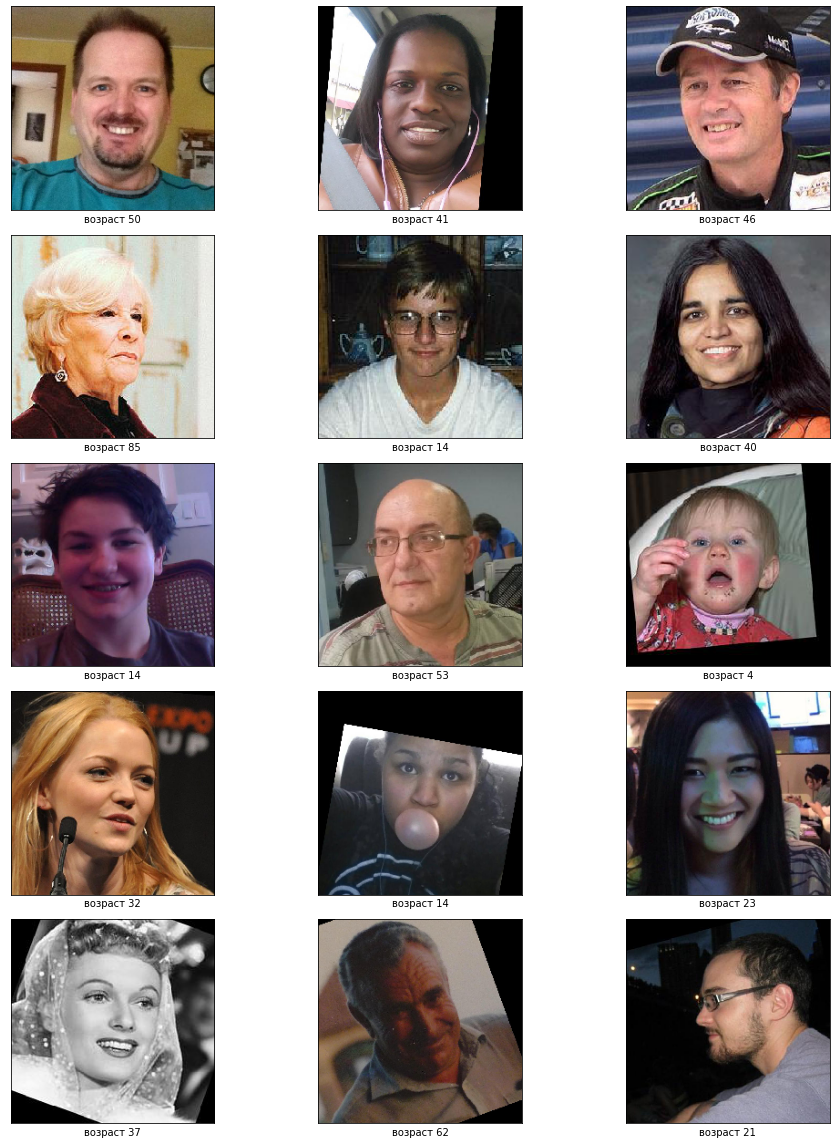

In [6]:
# печать 15-ти фотографий, с указанием возраста

features, target = next(datagen_flow)

fig = plt.figure(figsize=(16,16))

for i in range(15):
    fig.add_subplot(5, 3, i+1)
    plt.imshow(features[i])
    
    plt.xlabel('возраст ' + str(target[i]))
    
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()
    

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Очень хорошо, что выведены фотографии. Это хорошая практика, помогает увидеть изображения, с которыми будет работать наша модель, заметить какие-то детали и особенности, улучшить понимание задачи и получить определенную интуицию. А также заранее оценить подходящие для наших данных методы аугментации. </div>

**Вывод к первому разделу**

*Выборка включает в себя 7591 фотографию людей разных возрастов. Анализ распределения возрастов показывает, что больше всего людей возрастов 18-40 лет, самый популярный возраст - 25 лет.*

*По визуальной оценке 15-ти фотографий первого батча, в паре фотографий есть сомнения по возрасту. В выводе на экран фотографий нескольких последующих батчей также встречаются единичные явные несоответствия "фото-возраст".*

*Выбивающееся из общего распределения число фотографий возрастов, кратных 10-ти (30, 40 лет и выше), говорит о том, что не для всех фотографий известен достоверный точный возраст. Для таких фотографий возраст был определён приблизительно.*

*В выборке присутствует вполне достаточное (даже избыточное) число людей среднего возраста, но мало людей детско-подросткового возраста и старше 60-ти лет. Модель может хорошо обучиться на людях от 18-ти до 40, но ошибаться на детях и пожилых.Возраста для выборки примерно соответствуют типичной возрастной структуре населения, но для модели можно бы и увеличить число фотографий людей от 10-ти до 18 лет, а также старше 40 лет.*

*Изображения людей на фотографиях разной цветовой гаммы, контрастности, с фоном из обычной жизни (не студийные фото, порой с другими людьми на заднем плане). Кроме того, некоторые изображения сделаны на основе других офлайн-фотографий,поэтому угол наклона разный и добавляется дополнительный фон. Всё это свидетельствует о необходимости проведения аугментации перед подачей данных в модель предсказания.* 

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Очень хорошо, ты произвел EDA и сформулировала выводы. </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Советую усилить выводы наблюдениями, сделанными после рассмотрения фотографий. Какие особенности изображений в датасете ты видишь (кроме возраста)? 

</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Отразил в выводе своё понимание особенностей изображений.
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b>
Очень подробно, молодец ))
    
Попробую выдвинуть  гипотезу, почему часть фото повернуты. Нужно понять, как собирался датасет. Насколько я понимаю, вначале было собрано много самых разных фото из интернета (в том числе этим объясняется наличие в выборке черно-белых фото, кадров из фильмов и фото знаменитостей).
    
Дальше с помощью алгоритмов компьютерного зрения были выплнены следующие операции:
    
  - Определенены лица и вырезаны из фото
  - Найден угол отклонения лица от вертикали и сделана попытка выравнивания.
    
Если активнее посмотреть на данные, то можно найти места, где алгоритм "промазал" в поиске лица )). Но это большая редкость. Гораздо чаще встречаются ошибки с поворотами, по моим наблюдениям на некачественных фото или где алгоритму помешали посторонние преметы - очки, жевачка и т.д.
</div>

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

def load_train(path):
  df_age = pd.read_csv(path + '/labels.csv')

  train_datagen = ImageDataGenerator(validation_split=0.25,
                                     rescale=1/255,                   
                                     horizontal_flip=True)
    
  train_datagen_flow = train_datagen.flow_from_dataframe(
      dataframe = df_age,
      directory = path + '/final_files/',
      x_col = 'file_name',
      y_col = 'real_age',
      target_size=(224, 224),
      batch_size=32,
      class_mode='raw',
      subset='training',
      seed=12345)

  return train_datagen_flow

def load_test(path):
  df_age = pd.read_csv(path + '/labels.csv')

  test_datagen = ImageDataGenerator(validation_split=0.25,
                                     rescale=1/255
                                     )
    
  test_datagen_flow = test_datagen.flow_from_dataframe(
      dataframe = df_age,
      directory = path + '/final_files/',
      x_col = 'file_name',
      y_col = 'real_age',
      target_size=(224, 224),
      batch_size=32,
      class_mode='raw',
      subset='validation',
      seed=12345)

  return test_datagen_flow

def create_model(input_shape):
  backbone = ResNet50(input_shape=input_shape,
                    weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                    include_top=False)

  model = Sequential()
  model.add(backbone)
  model.add(GlobalAveragePooling2D())
  model.add(Dense(units=1, activation='relu'))

  optimizer = Adam(lr=0.0001)
  model.compile(loss='mean_squared_error', 
                optimizer=optimizer, metrics=['mean_absolute_error'])
  return model

def train_model(model, train_data, test_data, batch_size=None, epochs=10,
                steps_per_epoch=None, validation_steps=None):

  model.fit(train_data,
            validation_data=test_data,
            steps_per_epoch=steps_per_epoch,
            validation_steps=validation_steps,
            batch_size=batch_size,
            verbose=2, epochs=epochs)
  
  return model

```

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Написаны функции для создания датагенераторов, а также создания и обучения модели. 
<hr>   
    
Правильный выбор лосс-функции, также хорошо подобран шаг обучения.</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Советую использовать аугментацию для обучающего набора, хотя бы отражение по горизонтали.

</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Добавил отражение по горизонтали и увеличил число эпох с 6-ти до 10-ти. Метрика улучшилась до 5.7. Пробовал также менять угол поворота на 15-20 градусов, но существенного улучшения нет, а число эпох надо увеличивать.
    
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

```

Train for 178 steps, validate for 60 steps

Epoch 1/10 178/178 - 66s - loss: 232.5452 - mean_absolute_error: 10.8003 - val_loss: 998.5760 - val_mean_absolute_error: 26.9018

Epoch 2/10 178/178 - 38s - loss: 76.2770 - mean_absolute_error: 6.5786 - val_loss: 580.6187 - val_mean_absolute_error: 
18.8313

Epoch 3/10 178/178 - 38s - loss: 50.0299 - mean_absolute_error: 5.3719 - val_loss: 248.9992 - val_mean_absolute_error: 
11.8003

Epoch 4/10 178/178 - 38s - loss: 35.7156 - mean_absolute_error: 4.5428 - val_loss: 126.5208 - val_mean_absolute_error: 
8.7073

Epoch 5/10 178/178 - 37s - loss: 25.2488 - mean_absolute_error: 3.8575 - val_loss: 73.7740 - val_mean_absolute_error: 
6.4653

Epoch 6/10 178/178 - 37s - loss: 21.1950 - mean_absolute_error: 3.5184 - val_loss: 72.6380 - val_mean_absolute_error: 
6.3769

Epoch 7/10 178/178 - 38s - loss: 17.6650 - mean_absolute_error: 3.2313 - val_loss: 73.0046 - val_mean_absolute_error: 
6.2879

Epoch 8/10 178/178 - 38s - loss: 15.6422 - mean_absolute_error: 3.0474 - val_loss: 67.8035 - val_mean_absolute_error: 
6.1873

Epoch 9/10 178/178 - 38s - loss: 11.9783 - mean_absolute_error: 2.6380 - val_loss: 60.0695 - val_mean_absolute_error: 
5.7368

Epoch 10/10 178/178 - 38s - loss: 9.9785 - mean_absolute_error: 2.4023 - val_loss: 58.3265 - val_mean_absolute_error: 
5.6956

60/60 - 9s - loss: 58.3265 - mean_absolute_error: 5.6956 
Test MAE: 5.6956

```

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Модель обучена и преодолела планку требуемой точности </div>

**Вывод кo второму разделу**

*С помощью загрузчика ImageDataGenerator все фотографии распределены на батчи в обучающей и тестовой выборках в соотношении 75/25, размер батча - 32 фотографии.* 

*Для обучения модели предсказания возраста покупателей по фотографии используется архитектура сети ResNet50, с выходом одного нейрона (предсказываемого возраста).*

*По результатам обучения нейронной сети средняя абсолютная ошибка на тестовой выборке составила 5.7 года, то есть модель определяет возраст покупателя с точностью "плюс-минус 5 с половиной лет."*

## Анализ обученной модели

**Общий вывод**

*Для предсказания возраста человека по фотографии использована модель архитектуры ResNet50 (50 cлоёв) с костяком, но без верхушки, то есть последние два слоя добавлены самостоятельно. Веса модели использовались уже предобученные (обучены классифицировать изображения на 1000 классов). Поскольку данных достаточно много, то заморозка слоёв не использовалась, обучены все 50 слоёв сети ResNet.*

*Подача данных в модель осуществлялась с помощью загрузчика ImageDataGenerator, по 32 картинки за батч. Для обучающей выборки проведена предварительная аугментация данных (преобразования фотографий для увеличения выборки) в виде дополнительного отражения по горизонтали.*

*Модель скомпилирована с помощью оптимизатора Adam, learning rate градиентного спуска - 0.0001, функция потерь - средняя квадратическая ошибка.*

*Число эпох обучения модели составило 10, переобучения не наблюдалось, на каждой эпохе планомерно снижалась метрика "средняя абсолютная ошибка" как в обучающей, так и в тестовой выборках.*

*По итогам обучения и тестирования нейросети на 7591 исходной фотографии получена средняя абсолютная ошибка 5.7 года при предсказании возраста покупателя.* 

*Вполне приемлемый результат, если возраст определяется с целью анализа покупок определённой возрастной группы (размером более, чем наша средняя абсолютная ошибка) и, соответственно, с целью определения товаров, которые можно предложить купить дополнительно.*

*Вместе с тем, для определения возраста покупателя при продаже алкоголя/сигарет модель может и не подойти, слишком велика ошибка там, где нужен точный возраст. Возможно, для этих целей проще определять возраст "на глаз", то есть провести исследование и получить такую "своеобразную" dummy-модель, а затем сравнить метрику ошибки с вышеобученной моделью.*

*Как бы то ни было, при любой цели применения модели можно попытаться улучшить предсказания путём:*

    * более внимательного анализа входных данных (проверить ещё раз все сомнительные пары "фото-возраст", исправить или 
    удалить  из выборки), по возможности выяснить достоверный возраст там, где он был поставлен примерно
    
    * добавления дополнительных фото людей от 10-ти до 18-ти лет и старше 40 лет, особенно нужно больше фото пожилых людей (что бросается в глаза при анализе распределения возрастов)
    
    * составления нескольких подвыборок данных по возрастам, скажем, с шагом в 10 или 20 лет. Прогнав отдельно каждую 
    подвыборку через модель, можно путём анализа средней абсолютной ошибки МАЕ каждой подвыборки определить, с какими 
    возрастами модель работает не очень хорошо, и добавить больше фото определённой возрастной группы в общую выборку. 




<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
В этом разделе стоит подробно расписать используемые для создания и обучения модели подходы:
    
 - Использованная архитектура (бэкбон + голова), а также загружались ли предобученные  или рандомные веса.
 - Параметры обучения: размер батча, оптимизатор, использовалась ли заморозка весов бэкбона,  количество эпох.
 - Достигнутые метрики, наблюдалось ли переобучение.
</div>

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>

Дополнил вывод согласно рекомндации.
    
Да, было бы хорошо изучить больше материалов по нейросетям, не только свёрточным. А то беглый взгляд на публикации показывает, что мы узнали мизерный процент по теме нейросетей.
    
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> дополнительные материалы </b>
В курсе уже есть ссылки на отдельные статьи. Со своей стороны поделюсь неплохими бесплатными курсами по нейронкам, дающим целостную картинку.
    
   - "Дип Лернинг на пальцах" (https://www.youtube.com/playlist?list=PL5FkQ0AF9O_o2Eb5Qn8pwCDg7TniyV1Wb).
   - Отличный бесплатный курс от Школы глубокого обучения МФТИ (https://stepik.org/org/dlschool), старт курса каждые пол года. Два семестра, один по основам и компьютерному зрению, второй по обработке естественного языка.
   - "Нейронные сети и компьютерное зрение" от Samsung Research Russia (https://stepik.org/course/50352/syllabus). Есть также продолжение по NLP.  

</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Хочу отметить очень грамотный план по улучшению модели путем работы с входными даными, на которых она обучалась. Действительно, это самый простой (и иногда самый дешевый) способ улучшить модель. Конечно при условии, что опция сбора дополнительных данных нам доступна.</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Исследовательский анализ данных выполнен
- [x]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [x]  MAE модели не больше 8
- [x]  Код обучения модели скопирован в финальную тетрадь
- [x]  Результат вывода модели на экран перенесён в финальную тетрадь
- [x]  По итогам обучения модели сделаны выводы

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Давай подведем итоги. 
Ты провел содержательный EDA, а также использовал предобученную модель и c помощью finetuning и transfer-learning обучил нейронку определять возраст покупателей. Требуемая точность получена. 
    
    
У меня нет критичных замечаний к твоей работе. Проект может быть принят уже сейчас. Возвращаю проект чтобы дать тебе возможность ознакомиться с моими комментариями, возможно у тебя возникнет желание задать вопросы или внести корректировки в проект.
    
    
Также напиши мне, если нужны рекомендации по материалам для самостоятельного развития в области нейронных сетей.
        
Жду твой проект на финальное ревью :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>

Проект принят. Поздравляю и желаю дальнейших успехов!
</div>